# **Importing Dependancies**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import nltk
from wordcloud import WordCloud # visualize the most common words
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer

# **Importing DataSets**

1. Train dataset

In [51]:
with open('train_data.txt', 'r') as file:
    train_data = file.readlines()

In [52]:
rows = [line.strip().split(':::') for line in train_data]

In [53]:
train = pd.DataFrame(rows,columns=['ID','Title','Genre','Description'])

In [54]:
train.drop('ID',axis=1,inplace=True)

In [62]:
train['length'] = train['Description'].apply(len)

In [63]:
train

,Title,Genre,Description,length
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625
...,...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642


2. Test Dataset

In [56]:
with open('test_data.txt', 'r') as file:
    test_data = file.readlines()

In [57]:
rows = [line.strip().split(':::') for line in test_data]

In [58]:
test = pd.DataFrame(rows,columns=['ID','Title','Description'])

In [59]:
id = test.ID

In [60]:
test.drop('ID',axis=1,inplace=True)

In [64]:
test['length'] = test['Description'].apply(len)

In [65]:
test

,Title,Description,length
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",510
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",674
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,590
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",681
4,Er nu zhai (1955),Before he was known internationally as a mart...,814
...,...,...,...
54195,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",701
54196,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,367
54197,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,324
54198,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",386


# **Data Visualization**

In [66]:
train.head()

,Title,Genre,Description,length
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


In [67]:
train.Genre.value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

**Genres**

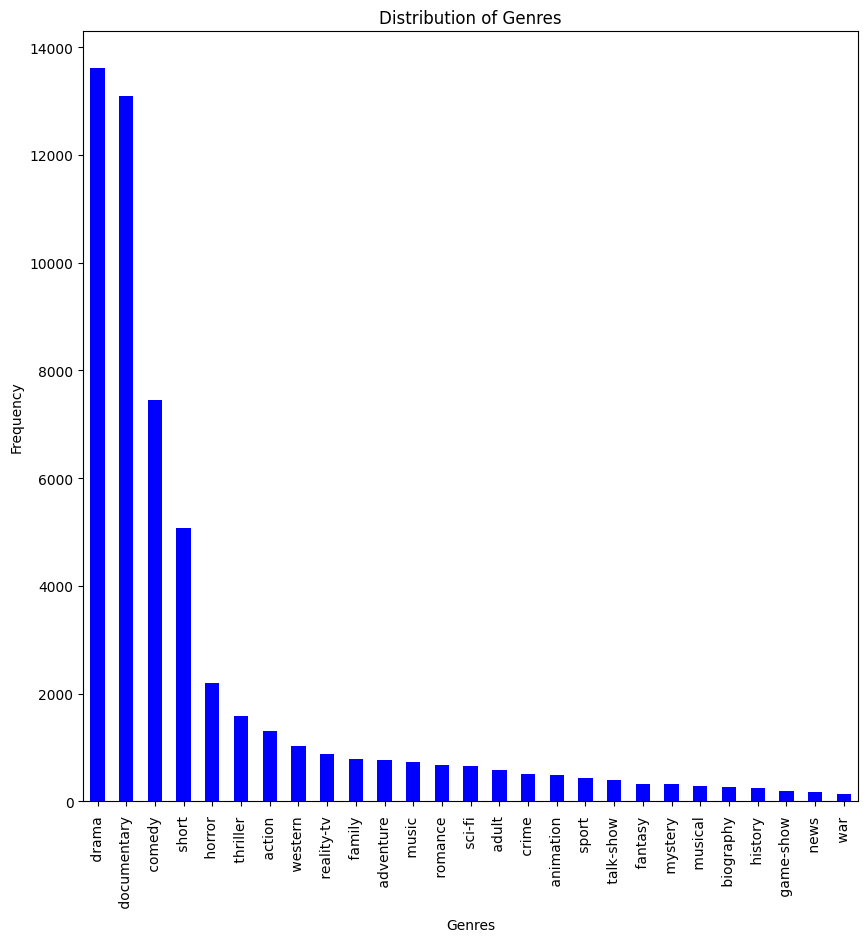

In [72]:
plt.figure(figsize=(10,10))
train['Genre'].value_counts().plot(kind='bar',colormap='winter')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency');

**Handling Outliers**

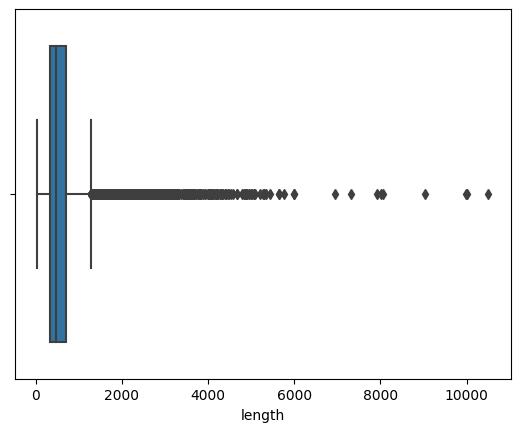

In [74]:
sns.boxplot(x=train['length']);

In [75]:
Q1 = train.length.quantile(0.25)
Q3 = train.length.quantile(0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

outliers = train[(train.length < min) | (train.length > max)]

In [77]:
min

-257.0

In [78]:
max

1295.0

In [76]:
outliers

,Title,Genre,Description,length
5,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,1609
18,"""Roller Warriors"" (2009)",sport,"Modern roller derby began in Austin, TX in 20...",2002
51,Saving Barbara Sizemore (2016),documentary,Black Schools Matter. The Barbara A. Sizemore...,1684
98,Henry & Verlin (1996),drama,"Verlin is 9 years old and does not talk, nor ...",1698
111,"""Elles et moi"" (2008)",drama,January 1939. The downfall of Barcelona confi...,1484
...,...,...,...,...
54130,Digital Amnesia (2014),documentary,Our memory is dissipating. Hard drives only l...,2328
54136,Cut Bank (2014),thriller,Dwayne McLaren has been looking for a way out...,1480
54179,Rory Gallagher: Live at Montreux (2006),music,"Disc one features tracks from 1975, 1977, 197...",1440
54180,Take It Back and Start All Over (2014),drama,Take it Back and Start All Over is a relation...,1523


In [79]:
train = train[train['length'] < 1500]

In [80]:
train

,Title,Genre,Description,length
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625
...,...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642


<Axes: xlabel='length'>

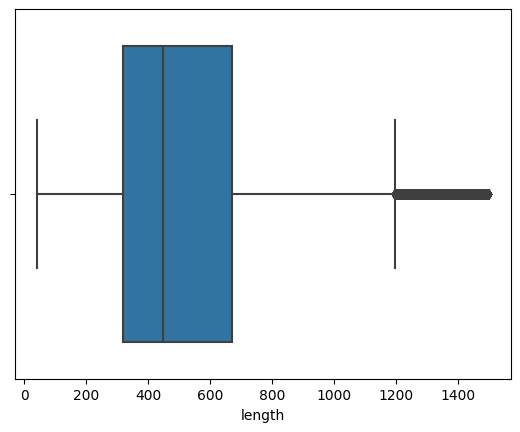

In [81]:
sns.boxplot(x=train.length)

In [94]:
def visualize(label):
  words = ''
  for msg in train[train['Genre'] == label]['Description']:
    msg = msg.lower()
    words += msg + ''
  wordcloud = WordCloud(width=600,height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

# **Data Preprocessing**

In [87]:
train

,Title,Genre,Description,length
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625
...,...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642
